## Tugas 1 SKC

## XOR Neural Network & Auto Associative Memory

### Mohammad Qori Aziz Hakiki - 23222020

### Deklarasi Library

In [2]:
import numpy as np

### 1. XOR Neural Network

### Deklarasi Variabel

Diinginkan membuat 2 layer neural network, layer 1 terdiri dari 2 perceptron dan layer 2 terdiri dari 1 perceptron. Expected output dibagi 3, yaitu:
 - Expected Output Daerah 1
 - Expected Output Daerah 2
 - Expected Total Output

Sedangkan input untuk tiap-tiap expected output sama.

In [3]:
P = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

t1 = np.array([0, 1, 1, 1])
t2 = np.array([1, 1, 1, 0])
t_out = np.array([0, 1, 1, 0])


In [4]:
# Pendefinisian fungsi-fungsi dasar
def Hardlim(input):
    if input >= 0:
        y = 1
    if input < 0:
        y = 0
    return y


def perceptron(X, Y):
    w = np.zeros(len(X[0]))
    b = 0
    iterate = 10

    for t in range(iterate):
        for i, x in enumerate(X):
            u = Hardlim(np.dot(X[i], w) + b)
            err = Y[i] - u
            # Perceptron Learning Rule
            w = w + (X[i]*err)
            b = b + err
    return w, b

In [5]:
# Training W untuk perceptron layer 1
w1, b1 = perceptron(P, t1)
w2, b2 = perceptron(P, t2)
print(w1, b1)
print(w2, b2)


[1. 1.] -1
[-2. -1.] 2


In [6]:
a1_1 = (Hardlim(np.dot(P[0], w1) + b1))
a1_2 = (Hardlim(np.dot(P[1], w1) + b1))
a1_3 = (Hardlim(np.dot(P[2], w1) + b1))
a1_4 = (Hardlim(np.dot(P[3], w1) + b1))

a2_1 = (Hardlim(np.dot(P[0], w2) + b2))
a2_2 = (Hardlim(np.dot(P[1], w2) + b2))
a2_3 = (Hardlim(np.dot(P[2], w2) + b2))
a2_4 = (Hardlim(np.dot(P[3], w2) + b2))

# input untuk second layer, diinginkan terjadi operasi AND
inp = np.array([
    [a1_1, a2_1],
    [a1_2, a2_2],
    [a1_3, a2_3],
    [a1_4, a2_4]
])
print(inp)


[[0 1]
 [1 1]
 [1 1]
 [1 0]]


In [7]:
# Pendefinisian second layer perceptron
w3, b3 = perceptron(inp, t_out)
print(w3, b3)


[1. 2.] -3


In [8]:
# Pengetesan Layer Ketiga
out_1 = (Hardlim(np.dot(inp[0], w3) + b3))
out_2 = (Hardlim(np.dot(inp[1], w3) + b3))
out_3 = (Hardlim(np.dot(inp[2], w3) + b3))
out_4 = (Hardlim(np.dot(inp[3], w3) + b3))

output = np.array([
    [out_1],
    [out_2],
    [out_3],
    [out_4]
])

print(output)

[[0]
 [1]
 [1]
 [0]]


### 2. Auto Associative Memory

### Deklarasi Variabel

In [9]:
P_auto = np.array([
    [-1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -
        1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1],  # 0
    [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],  # 1
    [1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, - \
        1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1],  # 2
])

t_auto = np.array([
    [-1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -
        1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1],  # 0
    [-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],  # 1
    [1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, - \
        1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1],  # 2
])


In [10]:
# Pendefinisian fungsi autoassociative memory
def auto_associative_NN(X):
    w = np.zeros((len(X[0]), len(X[0])))
    # print(w)a
    for i, x in enumerate(X):
        # Hebbian learning rule
        # Create N * N weight
        t = np.reshape(X[i], (len(X[i]), 1))
        p = np.transpose(t)
        w = w + (t @ p)
    return w


In [11]:
# Training W
w = auto_associative_NN(P_auto)
print(w)


[[ 3. -1. -1. -1. -1.  1. -1.  1.  1.  3.  3.  1. -1. -1. -1.  1. -1. -1.
  -1.  3.  3.  1.  1.  1.  1. -1. -1. -1. -1.  3.]
 [-1.  3.  3.  3.  3.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -3. -1. -1.
   3. -1. -1.  1.  1.  1.  1.  3.  3.  3.  3. -1.]
 [-1.  3.  3.  3.  3.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -3. -1. -1.
   3. -1. -1.  1.  1.  1.  1.  3.  3.  3.  3. -1.]
 [-1.  3.  3.  3.  3.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -3. -1. -1.
   3. -1. -1.  1.  1.  1.  1.  3.  3.  3.  3. -1.]
 [-1.  3.  3.  3.  3.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -3. -1. -1.
   3. -1. -1.  1.  1.  1.  1.  3.  3.  3.  3. -1.]
 [ 1.  1.  1.  1.  1.  3. -3.  3.  3.  1.  1. -1. -3.  1.  1. -1.  1. -3.
   1.  1.  1.  3.  3. -1.  3.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1. -3.  3. -3. -3. -1. -1.  1.  3. -1. -1.  1. -1.  3.
  -1. -1. -1. -3. -3.  1. -3. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  3. -3.  3.  3.  1.  1. -1. -3.  1.  1. -1.  1. -3.
   1.  1.  1.  3.  3. -1.  3.  1.  1.  1.  1.  1.]


In [12]:
# Test with some disturbance


P0_test = np.array([-1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -
                   1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1])  # Disturbed 0
P1_test = np.array([-1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1,
                   1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])  # Disturbed 1
target_0 = np.array([-1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1,
                    1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1])
target_1 = np.array([-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1,
                    1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])


P0_test_reshape = (np.reshape(P0_test, (5, 6)).T)
P1_test_reshape = (np.reshape(P1_test, (5, 6)).T)

# Get output from our model
out_0 = np.clip(P0_test @ w, -1, 1)
out_1 = np.clip(P1_test @ w, -1, 1)


# Visualisasi

# Print output and error from target
print("Output angka 0 dengan gangguan : ")

out_0_reshape = (np.reshape(out_0, (5, 6)).T)
print(out_0_reshape)
print("Error angka 0 dengan gangguan : ")
print(out_0 - target_0)


print("Output angka 1 dengan gangguan : ")

out_1_reshape = (np.reshape(out_1, (5, 6)).T)
print(out_1_reshape)
print("Error angka 1 dengan gangguan : ")
print(out_1 - target_1)


Output angka 0 dengan gangguan : 
[[-1.  1.  1.  1. -1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1. -1.  1.]
 [ 1. -1. -1. -1.  1.]
 [-1.  1.  1.  1. -1.]]
Error angka 0 dengan gangguan : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Output angka 1 dengan gangguan : 
[[-1.  1.  1. -1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1.  1. -1. -1.]]
Error angka 1 dengan gangguan : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## Plot hasil neural network terdistorsi    

<Figure size 1080x1080 with 0 Axes>

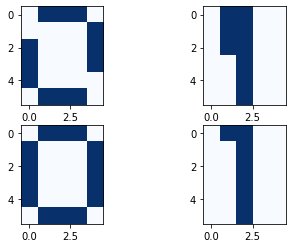

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))


f, axarr = plt.subplots(2, 2)
axarr[0][0].imshow(P0_test_reshape, cmap='Blues', interpolation='none')
axarr[0][1].imshow(P1_test_reshape, cmap='Blues', interpolation='none')
axarr[1][0].imshow(out_0_reshape, cmap='Blues', interpolation='none')
axarr[1][1].imshow(out_1_reshape, cmap='Blues', interpolation='none')


### Kesimpulan

Dari nilai error yang 0 dan output yang bisa merestorasi target saat diberikan sedikit noise, dapat dilihat bahwa sistem autoassociative memory neural network berhasil dilatih.